## ECGR 4105 - Homework 5

## Problem 1

The original Temperature Prediction model will be changed to a Non-Linear System considering the following description:

w2 * t_u ** 2 + w1 * t_u + b

1. The training loop will be modified to accomodate the new definition
2. 5000 epochs will be used for the training and different learning rates from 0.1 to 0.0001 will be explored and the loss for   every 500 epochs per training will be reported.
3. The best Non-Linear Model will be selected and the final best loss will be compared against a Linear Model.

In [3]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Pytorch and Tensorflow
import torch
torch.version.__version__
import torch.optim as optim
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Function Definations

# Linear Model
def model(t_u, w, b):
  return w * t_u + b

# Loss Function
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0

def Grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])
 
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params

    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = Grad_fn(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

In [5]:
# Getting the Input Data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


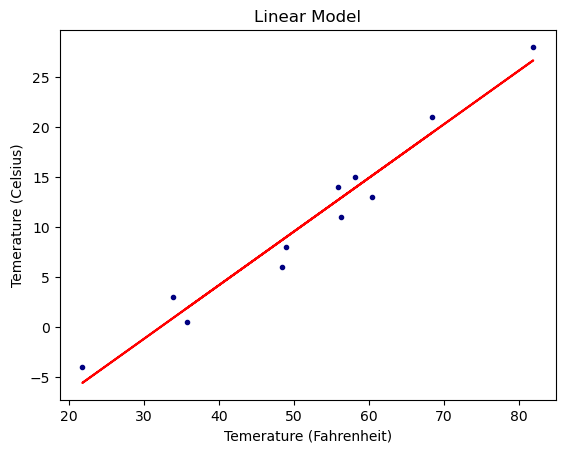

In [9]:
t_un = 0.1 * t_u
params = training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]),
                       t_u = t_un, t_c = t_c)

# Plotting The Linear Model 
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure()
plt.xlabel("Temerature (Fahrenheit)")
plt.ylabel("Temerature (Celsius)")
plt.title("Linear Model")
plt.plot(t_u.numpy(), t_p.detach().numpy(), color = "red")
plt.plot(t_u.numpy(), t_c.numpy(), '.', color = "navy");

In [10]:
# Non-Linear Model
def model_non_lin(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

def dmodel_dw1(t_u, w1, w2, b):
    return t_u

def dmodel_dw2(t_u, w1, w2, b):
  return t_u**2

def dmodel_db_non_lin(t_u, w1, w2, b):
    return 1.0

def grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
  dloss_db = dloss_dtp * dmodel_db_non_lin(t_u, w1, w2, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

def training_loop_non_lin(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w1, w2, b = params

    t_p = model_non_lin(t_u, w1, w2, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b)
    params = params - learning_rate * grad
    
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


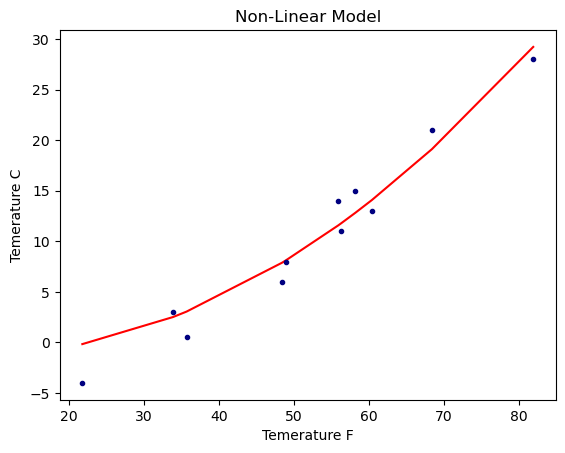

In [8]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u
params = training_loop_non_lin(n_epochs = 5000, learning_rate = 1e-4, params = torch.tensor([1.0, 1.0, 0.0]),
                               t_u = t_un, t_c = t_c)

# Plotting the Non-Linear Model
from matplotlib import pyplot as plt
t_p = model_non_lin(t_un, *params)

fig = plt.figure()
plt.xlabel("Temerature F")
plt.ylabel("Temerature C")
plt.title("Non-Linear Model")
plt.plot(np.sort(t_u.numpy()), np.sort(t_p.detach().numpy()), color = "r")
plt.plot(t_u.numpy(), t_c.numpy(), '.', color = "navy");

## Problem 2

A Preprocessing and a Training Loop to train a Linear Regression Model that predicts Housing Price based on the following Input Variables will be developed:

area, bedroom, bathrooms, stories, parking

For this problem, the "housing.csv" dataset will be used. For training and validation, 80% and 20% split will be used. The best parameters for the Linear Regression model will be identified and in this case, there will be 6 parameters:

U = (W5 * X5) + (W4 * X4) + (W3 * X3) + (W2 * X2) + (W1 * X1) + B

5000 epochs will be used for the training and different learning rates from 0.1 to 0.0001 will be explored and the loss for every 500 epochs per training will be reported.

In [103]:
# Importing the "Housing.csv" Dataset for Problem 2
housing = pd.DataFrame(pd.read_csv("Housing.csv")) 

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
New_train = housing[num_vars]
X = New_train.pop('price').to_numpy(np.float64)
Y = New_train.to_numpy(np.float64)

In [107]:
# Model and functions for training of Housing dataset
def model_house(x, w, b):
  return np.matmul(x, w) + b

def dmodel_dw1_house(x, w, b):
  return x[:,0]
def dmodel_dw2_house(x, w, b):
  return x[:,1]
def dmodel_dw3_house(x, w, b):
  return x[:,2]
def dmodel_dw4_house(x, w, b):
  return x[:,3]
def dmodel_dw5_house(x, w, b):
  return x[:,4]

def dmodel_db_house(x, w, b):
  return 1.0

def grad_fn_house(x, y, pred, w, b):
  dloss_dtp = dloss_fn(pred, y)
  dloss_dw1 = dloss_dtp * dmodel_dw1_house(x, w, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2_house(x, w, b)
  dloss_dw3 = dloss_dtp * dmodel_dw3_house(x, w, b)
  dloss_dw4 = dloss_dtp * dmodel_dw4_house(x, w, b)
  dloss_dw5 = dloss_dtp * dmodel_dw5_house(x, w, b)
  dloss_db = dloss_dtp * dmodel_db_house(x, w, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])
 
def training_loop_house(n_epochs, learning_rate, params, x, y):
  for epoch in range(1, n_epochs + 1):
    b = params[-1]
    w = params[:-1]
    
    pred = model_house(x, w, b)
    loss = loss_fn(pred, y)
    grad = grad_fn_house(x, y, pred, w, b)
    #print(params, grad)
    #input()
    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

Epoch 500, Loss 2024805783902.583984
Epoch 1000, Loss 1863258466727.914307
Epoch 1500, Loss 1768051362590.842285
Epoch 2000, Loss 1704595000950.190430
Epoch 2500, Loss 1659789065346.188721
Epoch 3000, Loss 1627244053690.387207
Epoch 3500, Loss 1603242094079.036621
Epoch 4000, Loss 1585383250941.523193
Epoch 4500, Loss 1572022959620.682617
Epoch 5000, Loss 1561993317652.091797
tensor(7528113.7117, dtype=torch.float64)
tensor(13300000., dtype=torch.float64)


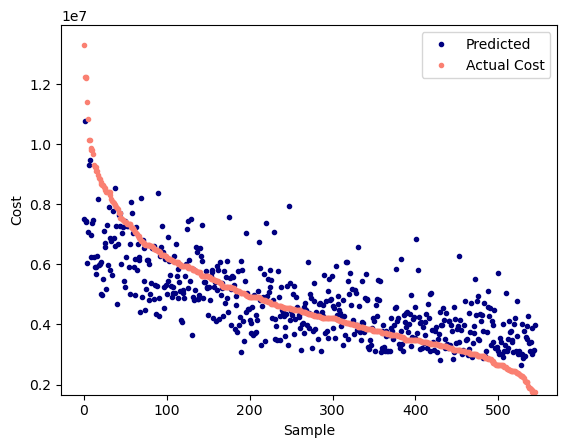

In [108]:
max_x = np.amax(x, axis=0)
max_y = np.amax(y)

new_x = x
new_y = y 

# Normalizing all the Parameters
new_x[:,0] = x[:,0]/max_x[0]
new_x[:,1] = x[:,1]/max_x[1]
new_x[:,2] = x[:,2]/max_x[2]
new_x[:,3] = x[:,3]/max_x[3]
new_x[:,4] = x[:,4]/max_x[4]

new_x = torch.tensor(new_x)
new_y = torch.tensor(new_y)

# train model
params = training_loop_house(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
                             x = new_x, y = new_y)

# Plotting the Datapoints and the Paramters
from matplotlib import pyplot as plt

pred = model_house(new_x, params[:-1], params[-1])
print(pred[0])
print(new_y[0])
fig = plt.figure()
plt.xlabel("Sample")
plt.ylabel("Cost")
plt.ylim([np.amin(y) * .95, np.amax(y) * 1.05])
plt.plot(pred.detach().numpy(), '.', label = "Predicted", color = "navy")
plt.plot(new_y.numpy(), '.', label = "Actual Cost", color = "salmon")
plt.legend();

In [66]:
# Training the Model
params = training_loop_house(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = new_x,
y = new_y)

Epoch 500, Loss 1562038499136.447754
Epoch 1000, Loss 1533011436311.196289
Epoch 1500, Loss 1531161953474.365967
Epoch 2000, Loss 1531023620738.500000
Epoch 2500, Loss 1531010431223.014648
Epoch 3000, Loss 1531008830650.815186
Epoch 3500, Loss 1531008603760.256592
Epoch 4000, Loss 1531008569139.817139
Epoch 4500, Loss 1531008563697.867432
Epoch 5000, Loss 1531008562832.778076


In [67]:
# Training the Model
params = training_loop_house(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = new_x,
y = new_y)

Epoch 500, Loss 3072062726282.625000
Epoch 1000, Loss 2296907167134.038574
Epoch 1500, Loss 2232371360543.121582
Epoch 2000, Loss 2193782354830.532227
Epoch 2500, Loss 2159229566168.539551
Epoch 3000, Loss 2127641802634.025635
Epoch 3500, Loss 2098653066954.163330
Epoch 4000, Loss 2071963969776.394531
Epoch 4500, Loss 2047315431531.889160
Epoch 5000, Loss 2024482486682.451904


In [68]:
# Training the Model
params = training_loop_house(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x = new_x,
y = new_y)

Epoch 500, Loss 19251112139782.328125
Epoch 1000, Loss 14310293891420.976562
Epoch 1500, Loss 10812095187644.593750
Epoch 2000, Loss 8334880776716.513672
Epoch 2500, Loss 6580251272419.132812
Epoch 3000, Loss 5337023626161.937500
Epoch 3500, Loss 4455739431133.308594
Epoch 4000, Loss 3830623970746.783203
Epoch 4500, Loss 3386818298639.674316
Epoch 5000, Loss 3071343142051.184570


## Problem 3

A fully connected Neural Network will be built for the "Housing.csv" Dataset. For training and validation, 80% and 20% split will be used. For this part, only one hidden layer with 8 nodes will be used. The Network will be trained for 200 epochs. The training time, training loss, and evaluation accuracy after 200 epochs will be reported. 

The Network, built in the previous part, will be extended with two more additional hidden layers.The Network will be trained for 200 epochs.The training time, training loss, and evaluation accuracy after 200 epochs will be reported.

In [76]:
num_vars = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea", "price"]

varList = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

# Applying the Binary Mapping Technique (Converting Yes or No to either 1 or 0)
def binary_map(x):
    return x.map({'yes':1,"no":0})

housing[varList] = housing[varList].apply(binary_map)

In [70]:
# Code Snippet to Ignore and get rid of the Warnings
import warnings
warnings.filterwarnings("ignore")

In [71]:
# splitting the data
scaler = StandardScaler()
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = np.random)

df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

# scaling the data
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])

y_Newtrain = df_Newtrain.pop('price')
x_Newtrain = df_Newtrain
y_Newtest = df_Newtest.pop('price')
x_Newtest = df_Newtest

# convert the data to tensors
x_train = torch.tensor(x_Newtrain.values).float()
x_val = torch.tensor(x_Newtest.values).float()
y_train = torch.tensor(y_Newtrain.values).float().unsqueeze(-1)
y_val = torch.tensor(y_Newtest.values).float().unsqueeze(-1)
print(y_val.size())

torch.Size([109, 1])


In [72]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val, y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        p_train = model(x_train) 
        loss_train = loss_fn(p_train, y_train)

        p_val = model(x_val) 
        loss_val = loss_fn(p_val, y_val)
        
        optimizer.zero_grad()
        loss_train.backward() 
        optimizer.step()

        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [73]:
seq_model = nn.Sequential(
            nn.Linear(len(num_vars)-1, 8),
            nn.Tanh(),
            nn.Linear(8, 1))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model, loss_fn = nn.MSELoss(), 
              x_train = x_train, x_val = x_val, y_train = y_train, y_val = y_val)

Epoch 1, Training loss 1.1249, Validation loss 1.0902
Epoch 10, Training loss 1.0952, Validation loss 1.0638
Epoch 20, Training loss 1.0638, Validation loss 1.0358
Epoch 30, Training loss 1.0339, Validation loss 1.0092
Epoch 40, Training loss 1.0056, Validation loss 0.9838
Epoch 50, Training loss 0.9786, Validation loss 0.9597
Epoch 60, Training loss 0.9529, Validation loss 0.9366
Epoch 70, Training loss 0.9285, Validation loss 0.9147
Epoch 80, Training loss 0.9052, Validation loss 0.8937
Epoch 90, Training loss 0.8830, Validation loss 0.8737
Epoch 100, Training loss 0.8619, Validation loss 0.8546
Epoch 110, Training loss 0.8417, Validation loss 0.8363
Epoch 120, Training loss 0.8224, Validation loss 0.8188
Epoch 130, Training loss 0.8040, Validation loss 0.8021
Epoch 140, Training loss 0.7865, Validation loss 0.7861
Epoch 150, Training loss 0.7697, Validation loss 0.7708
Epoch 160, Training loss 0.7537, Validation loss 0.7561
Epoch 170, Training loss 0.7384, Validation loss 0.7421
Epo

In [80]:
seq_model_2 = nn.Sequential(nn.Linear(len(num_vars)-1, 8), nn.Tanh(), 
                            nn.Linear(8, 6), nn.Tanh(), 
                            nn.Linear(6, 4), nn.Tanh(), nn.Linear(4, 1))

optimizer = optim.SGD(seq_model_2.parameters(), lr=1e-3)

training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model_2, loss_fn = nn.MSELoss(),
              x_train = x_train ,x_val = x_val, y_train = y_train, y_val = y_val)

Epoch 1, Training loss 1.0951, Validation loss 1.0998
Epoch 10, Training loss 1.0908, Validation loss 1.0955
Epoch 20, Training loss 1.0861, Validation loss 1.0910
Epoch 30, Training loss 1.0817, Validation loss 1.0867
Epoch 40, Training loss 1.0775, Validation loss 1.0826
Epoch 50, Training loss 1.0735, Validation loss 1.0786
Epoch 60, Training loss 1.0696, Validation loss 1.0749
Epoch 70, Training loss 1.0659, Validation loss 1.0713
Epoch 80, Training loss 1.0624, Validation loss 1.0679
Epoch 90, Training loss 1.0591, Validation loss 1.0647
Epoch 100, Training loss 1.0558, Validation loss 1.0616
Epoch 110, Training loss 1.0527, Validation loss 1.0586
Epoch 120, Training loss 1.0498, Validation loss 1.0557
Epoch 130, Training loss 1.0470, Validation loss 1.0530
Epoch 140, Training loss 1.0442, Validation loss 1.0504
Epoch 150, Training loss 1.0416, Validation loss 1.0479
Epoch 160, Training loss 1.0391, Validation loss 1.0455
Epoch 170, Training loss 1.0367, Validation loss 1.0431
Epo